In [2]:

import os
import pandas as pd
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.transform import resize
import numpy as np
import pandas as pd
import random as ran
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from keras import  models, layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

## Ola 4
### Task 1
In this assignment we will be working with Convolutional Neural Networks (CNNs). We will be using the Cats and Dogs dataset from the Kaggle competition. The dataset contains 25,000 images of cats and dogs.

In [3]:


image_dir = os.getcwd()+"\\CNN\\train\\"
#image_dir =  r"C:\Users\KRP\Programming\School\AiCphBusiness\MachineLearning\Assignment4\CNN\train" + "\\"
filenames = os.listdir(image_dir)
labels = [x.split(".")[0] for x in filenames]
img = [imread(image_dir + x) for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels, "img": img})

for index, row in data.iterrows():
    img = imread(image_dir + row["filename"])
    img = resize(img, (80,80))
    data.loc[index, "img"] = img

data = data.reset_index()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5533 entries, 0 to 5532
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     5533 non-null   int64 
 1   filename  5533 non-null   object
 2   label     5533 non-null   object
 3   img       5533 non-null   object
dtypes: int64(1), object(3)
memory usage: 173.0+ KB


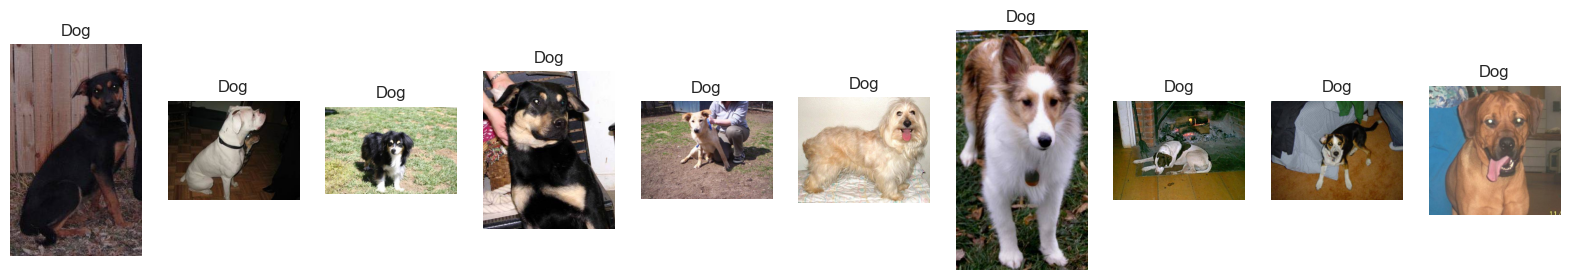

In [4]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)

i = 0
j = 0 

while (i < 10):
    
    filename =  'dog.' + str(j) + '.jpg'
    j += 1
    if(os.path.exists(os.getcwd()+"\\CNN\\train\\"+filename) == False):
        continue

    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    i += 1

    image = imread("CNN\\train\\"+filename)
    plt.imshow(image)
    plt.title('Dog',fontsize=12)
    plt.axis('off')

plt.show()

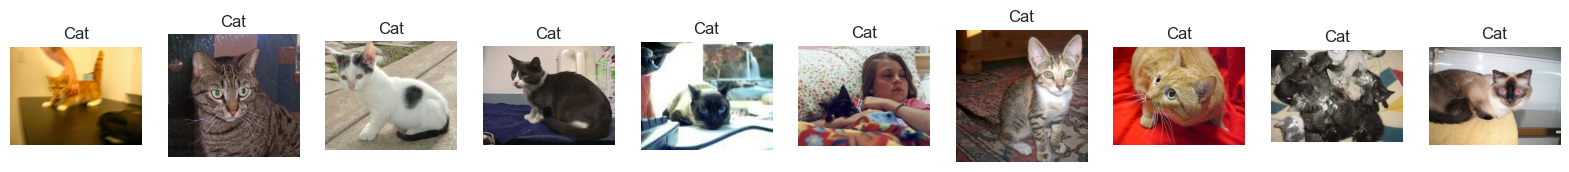

In [5]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)

i = 0
j = 0 

while (i < 10):
    
    filename =  'cat.' + str(j) + '.jpg'
    j += 1
    if(os.path.exists(os.getcwd()+"\\CNN\\train\\"+filename) == False):
        continue

    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    i += 1

    image = imread("CNN\\train\\"+filename)
    plt.imshow(image)
    plt.title('Cat',fontsize=12)
    plt.axis('off')

plt.show()

In [6]:
#Splitting the data into training and testing
train_df, test_df = train_test_split(data, test_size=0.3)

# Datagen for training data. Augment the data by rotating, shifting, flipping, to make the model more robust and less prone to overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assuming you have a directory with training images stored in 'train_directory'
train_generator = train_datagen.flow_from_dataframe(dataframe = train_df,
    directory=image_dir,
    target_size=(64, 64),
    x_col='filename',
    y_col='label',
    batch_size=32,
    class_mode='binary'  # or 'categorical' based on your problem
)



Found 3873 validated image filenames belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(64, 64),
    batch_size=32,
    class_mode= "binary"  # or 'categorical'
)

Found 1660 validated image filenames belonging to 2 classes.


### Task 2
In this section we will create a CNN model using Keras. We will start with a simple model and then add more layers to see if we can improve the model.

In [ ]:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),  # Adjust input_shape based on your image dimensions
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    # Add more layers as needed
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='sigmoid')  # or more units with 'softmax' for multi-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
trained_model = model.fit(train_generator,validation_data = test_generator, epochs=30)

Epoch 1/30


ValueError: in user code:

    File "C:\Users\krist\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\krist\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\krist\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\krist\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\krist\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\krist\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\krist\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\krist\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\krist\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\krist\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 2) are incompatible


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),  # Added a deeper layer
    MaxPooling2D(2, 2),                     # Additional pooling layer
    Flatten(),
    Dropout(0.5),                           # Dropout for regularization
    Dense(512, activation='relu'),
    Dropout(0.5),                           # Another dropout layer before the final classification layer
    Dense(2, activation='softmax')          # Using softmax for multi-class classification
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
trained_model2 = model.fit(train_generator,validation_data = test_generator, epochs=60)

In [ ]:
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(65, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])
catdog = model.fit(train_generator,validation_data = test_generator, epochs=100)


### Task 3
In this section we will evaluate the model and plot the loss and accuracy of the model.

In [ ]:
plt.plot(catdog.history['loss'])
plt.plot(catdog.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(catdog.history['accuracy'])
plt.plot(catdog.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Overall, the model seems to perform well, as it has a high accuracy and low loss. However the model jumps around which we have difficulty explaining.  We believe that the model could be too complex or the dataset may not be robust enough to train the model. We could try to add more data or use techniques like dropout to prevent overfitting.

## Task 5
a. ANN and CNN Definition: ANNs( Artificial Neural Networks= are computational models inspired by the human brain. They are composed of layers of nodes, where each node is connected to every other node in the next layer. CNNs (Convolutional Neural Networks) are a type of ANN that are particularly well-suited for image classification tasks. They use a series of convolutional layers to extract features from the input image, followed by a series of fully connected layers to classify the image.

b. The CNN model we're working with is a constructed for image classification, featuring three convolutional layers. The first two layers are configured with 32 filters each, and the third with 64 filters, all utilizing a (3, 3) kernel size, effectively capturing complex patterns within the moderate 64x64 pixel resolution. Each convolutional layer is followed by a max-pooling layer with a (2, 2) pool size, significantly reducing the spatial dimensions of the input to streamline computations and improve the model's robustness to scale and orientation variations in images. To combat potential overfitting, we applied dropout layers. Dropout layers are made with a 0.5 drop out rate rate, randomly omitting half of the neuron outputs from previous layers during training phases.

We continue the model with dense layers merged into the learned features into useful classification patterns, with an initial dense layer consisting of 64 units followed by a sigmoid-activated output layer tailored for binary classification outputs. These dense layers employ relu activation to introduce non-linearity, essential for capturing complex relationships within the data.

For fitting the model, trained over 100 epochs with the default learning rate (0.001).  Typically, an optimizer like Adam is preferred for its adaptive learning rate capabilities, ensuring efficient convergence. This architectural configuration, from convolutional to dropout to dense layers, is designed to balance computational efficiency and robust generalization, minimizing overfitting while optimizing the model's performance on unseen data.

c. Activation functions help introduce non-linearity into the network, enabling it to learn complex patterns. Commonly used functions include relu (implimenttion in convolutional layers) and Softmax (used in the output layer for multi-class classification). These functions help decide whether a neuron should be activated or not.

d. From what we can tell CNN requires large amount of data to train. The more data you have, the better the model will perform. CNNs are also computationally expensive, so they require a lot of computational resources to train models. They are also prone to overfitting, so it is important to use techniques like dropout and data augmentation to prevent this. CNNs are also difficult to interpret, so it can be hard to understand why the model is making certain predictions. We spent several hours to replecate prefect learning curves and we could not.

   CNN however performs best when classifying images. Compared to other classifiers like SVM or decision trees, CNNs can automatically detect important features without manual intervention, handle variability in images, and perform well with large datasets.

In [9]:
model.save("dogvscat.h5")

In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\krist\AppData\Local\Temp\tmp4c8bgfs3\assets


INFO:tensorflow:Assets written to: C:\Users\krist\AppData\Local\Temp\tmp4c8bgfs3\assets


In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model


# Load the image you want to predict
img_path = "CNN\dog\dog.34.jpg"
img = image.load_img(img_path, target_size=(64, 64))
# Preprocess the image
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\krist\AppData\Local\Temp\ipykernel_24456\4212346768.py:8: SyntaxWarning: invalid escape sequence '\d'
  img_path = "CNN\dog\dog.34.jpg"
C:\Users\krist\AppData\Local\Temp\ipykernel_24456\4212346768.py:8: SyntaxWarning: invalid escape sequence '\d'
  img_path = "CNN\dog\dog.34.jpg"


ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [14]:
print(img_batch)
print(img_batch.shape())

[[[[ 15.  52.  19.]
   [ 32.  70.  31.]
   [ 71. 110.  81.]
   ...
   [106. 116.  89.]
   [ 80.  93.  65.]
   [141. 155. 122.]]

  [[ 48.  83.  59.]
   [ 42.  66.  32.]
   [ 49.  84.  52.]
   ...
   [141. 154. 137.]
   [141. 157. 130.]
   [112. 141. 110.]]

  [[ 61.  82.  51.]
   [ 60.  83.  65.]
   [ 44.  78.  43.]
   ...
   [108. 131.  87.]
   [116. 141. 101.]
   [103. 132.  86.]]

  ...

  [[ 93. 124.  83.]
   [ 80. 119.  75.]
   [ 70. 105.  65.]
   ...
   [ 93. 132.  69.]
   [ 84. 117.  74.]
   [ 91. 126.  86.]]

  [[ 55.  81.  46.]
   [ 84. 118.  81.]
   [ 76. 113.  80.]
   ...
   [ 90. 128.  81.]
   [ 88. 127.  70.]
   [ 78. 117.  72.]]

  [[ 52.  77.  38.]
   [ 66.  99.  56.]
   [ 92. 118.  83.]
   ...
   [ 91. 122.  80.]
   [ 65.  93.  52.]
   [ 82. 125.  80.]]]]
(1, 64, 64, 3)
